In [1]:
#This maze is represented as a 2D matrix, where each element can be:
#A free path (0)
#An obstacle (1)
#The objective (G)
#The goal is to develop an agent that can learn how to navigate from a starting point to the objective while avoiding obstacles.

In [2]:
#Libraries needed for the project
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#Function to create a maze
def maze_creation(size, wall_percentage, start=(0,0), goal=None):
    maze = np.zeros((size,size))
    walls_number = int((size*size)*wall_percentage / 100)

    #Walls location
    for wall in range(walls_number):
        x,y = random.randint(0,size-1), random.randint(0,size-1)

        #Start and Goal cannot be walls
        if (x,y) != start and (goal is None or (x,y) != goal):
            maze[x,y] = 1

    #Goal location
    if goal:
        maze[goal] = 9 # "9" represents the objective
    else:
        #Randomly locate the goal if not specified
        while True:
            x,y = random.randint(0, size-1), random.randint(0,size-1)
            if maze[x,y] == 0 and (x,y) != start:
                maze[x,y] = 9

    return maze

In [4]:
#Function for Visualizing the Maze
def maze_visualization(maze):
    plt.figure(figsize=(5,5))
    plt.imshow(maze, cmap = "hot", interpolation="nearest")
    plt.colorbar()

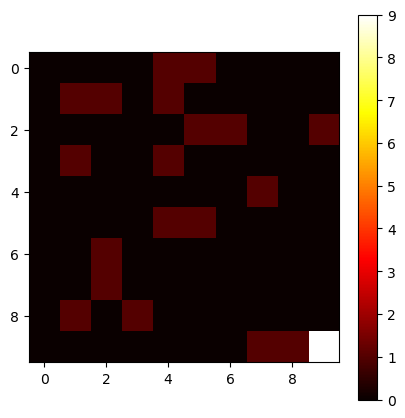

In [5]:
#Maze Creation and Visualization Example
maze = maze_creation(10,20,start=(0,0),goal=(9,9))
maze_visualization(maze)

In [6]:
#Q-learning parameters
alpha = 0.1  #Learning rate: The machine will learn slowly, and existing actions will gain more weight
gamma = 0.9  #Discount factor: The machine will focus on long-term learning rewards
epsilon = 0.1  #The machine's actions will tend to explore 10% of the time
episodes_number = 500  #Number of learning iterations the machine will execute to interact with the environment

In [7]:
#Function to select an action balancing between exploitation and exploration
def greedy_epsilon(Q, state, state_size):
    if random.uniform(0,1) < epsilon:
        return random.randint(0,3) #There are 4 possible actions: Up, Down, Left, Right 
    else:
        return np.argmax(Q[state])

In [8]:
#Function to simulate the action in the maze
def execute_action(state,action,maze,size):
    row,column = divmod(state,size)
    if action == 0 and row > 0: #Up
        row -=1
    elif action == 1 and row < size-1: #Down
        row +=1
    elif action == 2 and column > 0: #Left
        column -= 1
    elif action == 3 and column < size -1: #Right
        column += 1

    next_state = row*size+column

    #Decision making after updating the state
    if maze[row,column] == 1:
        reward = -100 #Penalty for hitting a wall
        next_state = state #The agent stays in the same place if it hits a wall
        ending = False
    elif maze[row,column] == 9:
        reward = 100 #Reward for reaching the objective
        ending = True
    else:
        reward = -1 #Minor penalty for each step to encourage faster solutions
        ending = False
        
    return next_state, reward, ending

In [9]:
#Main function to execute the Q-Learning Algorithm
def q_learning(maze,size,start,goal):
    Q = np.zeros((size*size,4)) #Initialize Q-table for all possible states and actions 

    #Iteration through 500 episodes
    for episode in range(episodes_number):
        state = start
        ending = False

        while not ending:
            action = greedy_epsilon(Q,state,size)
            next_state, reward, ending = execute_action(state,action,maze,size)
            Q[state,action] += alpha * (reward + gamma * max(Q[next_state, :])-Q[state,action]) #Bellman equation
            state = next_state
    
    return Q

In [10]:
#Function to convert coordinates to lineal indexes
def index_position(position, size):
    return position[0]*size+position[1]

In [35]:
#Maze and Q-Learning configuration
size = 10
start_position = (0,0)
goal_position = (9,9)

maze = maze_creation(size, 20, start = start_position, goal = goal_position)
start = index_position(start_position, size)
goal = index_position(goal_position, size)
Q_values = q_learning(maze,size,start, goal)

In [12]:
#Function to show the agent's learning
def show_agents_learning(maze, Q, start, goal, size):
    row, column = divmod(start, size)
    route= [(row, column)]
    state = start

    while state != goal:
        action = np.argmax(Q[state])
        state,_,_= execute_action(state,action,maze,size)
        row,column = divmod(state, size)
        route.append((row,column))
    
    #Show the path learnt on the maze
    plt.figure(figsize=(5,5))
    plt.imshow(maze, cmap = "hot", interpolation ="nearest")
    rows,columns = zip(*route)
    plt.plot(columns,rows, marker="o", color="c")
    plt.colorbar();

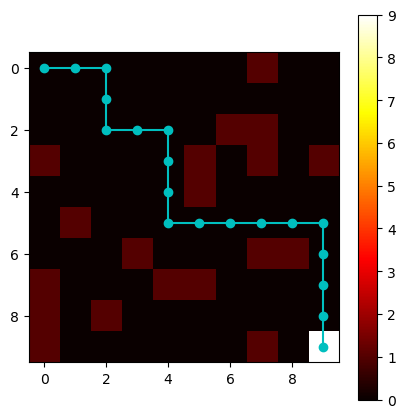

In [37]:
#Final results
show_agents_learning(maze, Q_values,start,goal,size)